# The *k*-nearest neighbours classifier

In [1]:
# Include some standard imports.

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## The KNeighborsClassifier library functions

In the module materials you have seen how the *k*-nearest neighbours algorithm (*k*-NN) can be used as a simple technique for classifying a new object based on how closely it matches the properties of other objects which have already been classified. In this Notebook we will work through some examples of how to use the Python libraries to build and use a *k*-NN classifier.

The `SKLearn` library in Python provides a set of functions for carrying out *k*-nearest neighbours analyses. In this Notebook you will use use this library to carry out some nearest neighbour classification tasks. The library is implemented in the `sklearn.neighbors` library.

To see how to use the library on a simple example, we will start by using the patient data (Part 20, Figure 20.3).

The data has been saved in the file [patients.csv](./data/patients.csv), which we can import as a DataFrame:

In [2]:
patients_df = pd.read_csv('data/patients.csv')
patients_df.head()

,Patient group,Exercise time (hours),Sleep time (hours)
0,A,0.7,5.2
1,A,0.6,5.6
2,A,1.0,5.0
3,A,1.8,5.5
4,A,3.0,6.6


The columns `Exercise time (hours)` and `Sleep time (hours)` give the values in hours of the two features of each patient. This DataFrame also contains a column `Patient group` which contains the classification of each of the patients into groups A and B.

To get a feel for the data, we can treat the `Exercise time (hours)` and `Sleep time (hours)` columns as points in a 2-dimensional space, and plot them with a scatter plot:

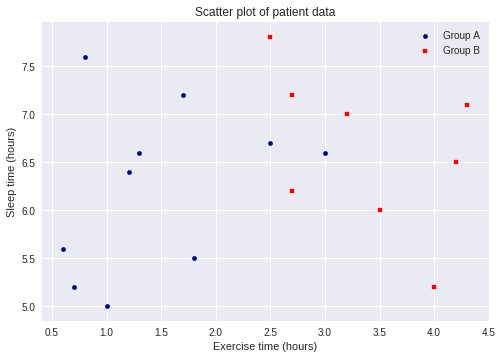

In [3]:
groupA_df = patients_df[patients_df['Patient group']=='A']
groupB_df = patients_df[patients_df['Patient group']=='B']

ax = groupA_df.plot(x='Exercise time (hours)',
                    y='Sleep time (hours)',
                    kind='scatter', color='DarkBlue', label="Group A", marker="o",
                    title="Scatter plot of patient data")

groupB_df.plot(x='Exercise time (hours)', 
               y='Sleep time (hours)',
               kind='scatter', color='Red', label="Group B", marker='s', ax=ax)


Our aim is, given some new patients, if we're told how much time they have spent exercising, and how much time sleeping, can we classify them according to whether we think that they are of type A or type B?

To carry out the classification, we will use the analyser in the `KNeighborsClassifier` library. Import the library with:

In [4]:
from sklearn.neighbors import KNeighborsClassifier

Now, the first step is to create a classifier instance from the `KNeighborsClassifier` class. In the first instance, we will build a classifier with *k*=3, which is set using the parameter `n_neighbors` in the initialisation. We will also set the chosen metric to be Euclidean separation, as discussed in Section 3.1 of Part 20.

In [5]:
classifier_3NN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

Next we need to train the classifier on the training data. The `classifier_3NN` object has a method `fit(X, y)`, which takes an array of training data, `X` and a vector of classification values, `y`, to train the classifier.

When we use this library with *pandas*, we will usually pass the training data, `X`, to `fit` as a DataFrame, and the classification values, `y`, as a Series. 

In this case, we want the training data to be the columns `'Exercise time (hours)'` and `'Sleep time (hours)'` of `patients_df`, and the target values to be the column `patients_df['Patient group']`.


In [6]:

trainingData_df = patients_df[['Exercise time (hours)', 'Sleep time (hours)']]
targetValues_ss = patients_df['Patient group']

classifier_3NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Our 3-NN classifier is now ready to be used. To use the classifier to classify a new instance, we use the method `predict(X)` where `X` is an array of test data which the classifier will attempt to classify.

In this case, we will try to classify a new patient who has registered an exercise time of 2.5 hours, and a sleep time of 6.5 hours. This test case should be presented in the same format as the training data, so let's define a DataFrame with a single row and columns with the same headings as we used in the training data:

In [7]:
testData_df = pd.DataFrame({'Exercise time (hours)':[2.5],
                            'Sleep time (hours)':[6.5]})
testData_df

,Exercise time (hours),Sleep time (hours)
0,2.5,6.5


We then pass this to `predict`, which returns the class of the submitted data point.

In [8]:
classifier_3NN.predict(testData_df)

array(['A'], dtype=object)

In this case, the classifier has predicted that the new patient is of type A.

To classify several instances at once, we use more rows in the test data DataFrame:

In [9]:
testData_df = pd.DataFrame({'Exercise time (hours)':[2.5, 1.7, 2.8, 3],
                            'Sleep time (hours)':[6.5, 6.7, 7.0, 5.5]})
testData_df

,Exercise time (hours),Sleep time (hours)
0,2.5,6.5
1,1.7,6.7
2,2.8,7.0
3,3.0,5.5


When we pass this DataFrame to the classifier, a numpy array is returned with the *n*<sup>th</sup> value in the array being the class of the datapoint represented by the *n*<sup>th</sup> row of the test data. 

In [10]:
classifier_3NN.predict(testData_df)

array(['A', 'A', 'B', 'B'], dtype=object)

In fact, because the output of the classifier is a sequence of values rather than just a single value, it can be easier to see the classifications in a single DataFrame.

In [11]:
output_df = testData_df.copy()
output_df['Patient group'] = classifier_3NN.predict(testData_df)

output_df

,Exercise time (hours),Sleep time (hours),Patient group
0,2.5,6.5,A
1,1.7,6.7,A
2,2.8,7.0,B
3,3.0,5.5,B


To see how well the classifier is working, we can plot the test data on the same axes as the training data:

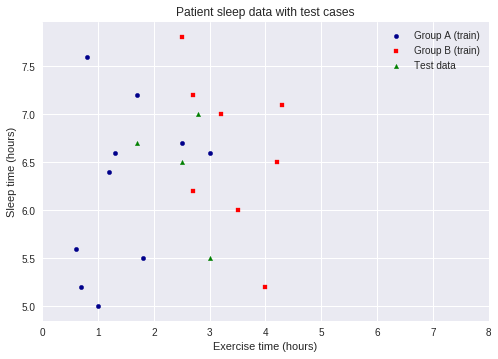

In [12]:
trainGroupA_df = patients_df[patients_df['Patient group']=='A']
trainGroupB_df = patients_df[patients_df['Patient group']=='B']

ax = trainGroupA_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                         kind='scatter', color='DarkBlue', label="Group A (train)", marker="o",
                         title="Patient sleep data with test cases")

trainGroupB_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                    kind='scatter', color='Red', label="Group B (train)", marker='s', ax=ax)

testData_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                 kind='scatter', color='Green', label="Test data",
                 marker='^', ax=ax)

# Extend the x-axis to better accommodate the labelling box:
plt.xlim((0, 8))

pass # Don't show any return values


In the previous scatter plot, the test data is shown as a collection of green triangles. To see how these points are classified, we can make another plot, using triangles to show where the new points are classified. As before, the test cases are shown by triangles, but they are now given the same colour as the class into which they have been classified.

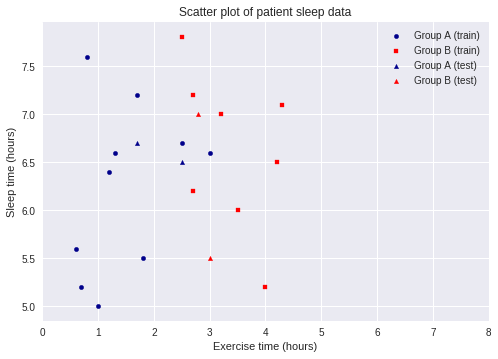

In [13]:
trainGroupA_df = patients_df[patients_df['Patient group']=='A']
trainGroupB_df = patients_df[patients_df['Patient group']=='B']

ax = trainGroupA_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                         kind='scatter', color='DarkBlue', label="Group A (train)", marker="o",
                         title="Scatter plot of patient sleep data")

trainGroupB_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                    kind='scatter', color='Red', label="Group B (train)", marker='s', ax=ax)

testGroupA_df=output_df[output_df['Patient group']=='A']
testGroupB_df=output_df[output_df['Patient group']=='B']

testGroupA_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                   kind='scatter', color='DarkBlue', label="Group A (test)", 
                   marker='^', ax=ax)

testGroupB_df.plot(x='Exercise time (hours)', y='Sleep time (hours)',
                   kind='scatter', color='Red', label="Group B (test)",
                   marker='^', ax=ax)

# Extend the x-axis to better accommodate the labelling box:
plt.xlim((0, 8))

pass # Don't show any return values

### Activity 1
As we discussed in Section 3.4 of Part 20, the choice of *k* for a *k*-NN classifier can affect the results of the classification process.

Use the same training data that we used previously in the Notebook to train a *k*-NN classifier for *k*=2, *k*=4 and *k*=5. Then use these classifiers to classify the test data in the `testData_df` DataFrame.

Which of the data points are classified differently for different values of *k*?

Our solution is below.

In [14]:
# set up classifiers
classifier_2NN = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
classifier_3NN = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier_4NN = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
classifier_5NN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [15]:
# input training data )using the DF and Series created earlier
classifier_2NN.fit(trainingData_df, targetValues_ss)
classifier_3NN.fit(trainingData_df, targetValues_ss)
classifier_4NN.fit(trainingData_df, targetValues_ss)
classifier_5NN.fit(trainingData_df, targetValues_ss)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
# classify the test data and put into single df
output_df = testdata_df.copy()
output_df['Patient group k=2'] = classifier_2NN.predict(testdata_df)
output_df['Patient group k=3'] = classifier_3NN.predict(testdata_df)
output_df['Patient group k=4'] = classifier_4NN.predict(testdata_df)
output_df['Patient group k=5'] = classifier_5NN.predict(testdata_df)

output_df

NameError: name 'testdata_df' is not defined

In [ ]:
output_df = testdata_df.copy()
for k in range(2,6):
    classifier_knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier_knn.fit(trainingData_df, targetValues_ss)

    output_df['Patient Group (k={})'.format(k)] = classifier_knn.predict(testdata_df)

output_df

#### Our solution

To reveal our solution, click on the triangle symbol on the left-hand end of this cell.

A simple example which would generate the classifications for the new points at different values of *k* is given here:

In [ ]:
output_df = testData_df.copy()

for k in range(2, 6):
    classifier_kNN = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier_kNN.fit(trainingData_df, targetValues_ss)
    
    output_df['Patient group (k={})'.format(k)] = classifier_kNN.predict(testData_df)

output_df

The test data points at (2.5, 6.5) and (2.8, 7.0) are both sensitive to the size of *k*. This could suggest that they are borderline cases. In a real task, the data analyst might want to single out these points for special consideration.

## Weighted voting

In Section 3.3 of Part 20, we discussed that a possible tweak to the general *k*-NN model might be to use a weighted voting strategy, whereby each node's contribution is scaled according to its proximity to the test node.

A weighted voting scheme has been implemented in the `KNeighborsClassifier` constructor. To use a weighted classifier, the call:

    KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
   
returns a classifier for *k* nearest neighbours, with Euclidean distance, and where the contribution of each point is weighted by the inverse of its distance from the new point.

Note: The default value of `weights` is `uniform`, where each of the *k* nearest points contribute equally to the class selection.

### Activity 2
Repeat Activity 20.1, but using a weighted classifier, rather than the uniform classifier.

Which data points appear to be most susceptible to the size of *k* for the weighted classifier?


In [ ]:
output_df = testdata_df.copy()

for k in range(2,9):
    classifier_knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    classifier_knn.fit(trainingData_df, targetValues_ss)
    
    output_df['PG weighted ({0})'.format(k)] = classifier_knn.predict(testdata_df)

output_df

#### Our solution

To reveal our solution, click on the triangle symbol on the left-hand end of this cell.

For the weighted classifier, the data points are all given the same classification for values of *k*. A weighted classification strategy can be more robust than the uniform strategy, but may be less informative about the borderline cases.

A code snippet to generate the figures for the test set is:

In [ ]:
output_df = testData_df.copy()

for k in range(2, 9):
    classifier_kNN = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    classifier_kNN.fit(trainingData_df, targetValues_ss)
    
    output_df['Patient group (k={})'.format(k)] = classifier_kNN.predict(testData_df)

output_df

## What next?

You have now completed this Notebook. You should now be able to tackle iCMA 46 Question 1.

If you are working through this Notebook as part of an inline exercise, return to the module materials now.

If you are working through this set of Notebooks as a whole, move on to `20.2 The leave-one-out algorithm`.

# ICMA46


In [ ]:
! head iCMA46/Wholesale\ customers\ data\ train.csv

In [ ]:
wholesale_df = pd.read_csv('iCMA46/Wholesale customers data train.csv')
wholesale_df.head()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')

In [ ]:
training_data_df = wholesale_df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
target_values_ss = wholesale_df['Channel']


In [ ]:
classifier.fit(training_data_df, target_values_ss)

In [ ]:
test_data = pd.DataFrame({'Customer name': ['Bebiba',' Ementa', 'Presunto'],
            'Fresh':[60080, 46681, 32204],
            'Milk':[7550,3817,26890],
            'Grocery':[42614,80473,11572],
            'Frozen': [29190, 60059, 40667],
            'Detergents_Paper': [38437,5463,22393],
            'Delicatessen':[34238, 18367, 30986]})
test_data.head()

In [ ]:
classifier.predict(test_data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']])

In [ ]:
def normalise(lowerlimit, upperlimit, x):
    '''scales a value to the range defined by the lower 
    and upper limits provided'''
    
    return ((x-lowerlimit)/(upperlimit-lowerlimit))

normalise(2, 6, 4)

In [20]:
irisdata_df = pd.read_csv('iCMA46/iris_data.csv')
irisdata_df.head()

FileNotFoundError: File b'iCMA46/iris_data.csv' does not exist

In [ ]:
normalised_iris_df = irisdata_df.copy()[['Sepal length', 'Sepal width', 'Petal width']]

In [18]:
def normalise_dataframe(df):
    res = pd.DataFrame()
    for c in df.columns:
        res[c] = df[c].apply(lambda x: normalise(max(df[c]), min(df[c]), x))
    return res

In [19]:
n_iris_training_df = normalise_dataframe(irisdata_df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']])
iris_target_values_df = irisdata_df['Species']
normalised_iris_df.head()

NameError: name 'irisdata_df' is not defined

In [ ]:
test_iris_data_df = pd.DataFrame(
    {'Sample': ['Sample 1','Sample 2','Sample 3','Sample 4'],
                    'Sepal length':  [4.32, 4.74, 6.20, 7.19],
                    'Sepal width': [3.35, 2.96, 3.06, 3.34],
                     'Petal length': [2.21, 6.46, 6.37, 1.81],
                    'Petal width': [0.38, 0.24, 1.46, 1.66]
                    })

test_iris_data_df.head()

In [ ]:
normalised_test_df = normalise_dataframe(test_iris_data_df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']])
normalised_test_df.head()

In [ ]:
iris_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')

In [ ]:
iris_classifier.fit(n_iris_training_df, iris_target_values_df )

In [ ]:
test_iris_data_df['Classification'] = iris_classifier.predict(normalised_test_df)

In [ ]:
test_iris_data_df

In [ ]:
normalise_dataframe(test_iris_data_df)